In [1]:
import pickle 
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
def decode(val):
    if val==0:
        return 'negative'
    else:
        return 'positive'

In [2]:
svm1 = pickle.load(open('svm1.sav','rb'))
svm2 = pickle.load(open('svm2.sav','rb'))
svm3 = pickle.load(open('svm3.sav','rb'))
svm4 = pickle.load(open('svm4.sav','rb'))
svm5 = pickle.load(open('svm5.sav','rb'))
svm6 = pickle.load(open('svm6.sav','rb'))
svm7 = pickle.load(open('svm7.sav','rb'))
svm8 = pickle.load(open('svm8.sav','rb'))
svm9 = pickle.load(open('svm9.sav','rb'))
svm10 = pickle.load(open('svm10.sav','rb'))
svm11 = pickle.load(open('svm11.sav','rb'))
svm12 = pickle.load(open('svm12.sav','rb'))

In [3]:
models = [svm1,svm2,svm3,svm4,svm5,svm6,svm7,svm8,svm9,svm10,svm11,svm12]

In [4]:
df = pd.read_csv('sample12.csv')
df.head()

,Unnamed: 0,0.1,1,2,3,4,5,6,7,8,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,class
0,9516,0.0,0.0,3.727443,0.000000,0.0,0.0,0.0,0.000000,3.844285,...,0.0,13.565496,1.377959,0.0,0.000000,0.000000,0.0,8.875432,0.0,positive
1,6193,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,2.342277,0.0,11.446189,0.000000,0.0,0.000000,0.0,positive
2,4384,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.328472,...,0.0,0.000000,0.000000,0.0,0.000000,8.928577,0.0,0.000000,0.0,positive
3,9927,0.0,0.0,0.000000,0.021892,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.629863,0.0,0.000000,0.0,positive
4,62,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.064756,0.000000,...,0.0,0.000000,1.679515,0.0,0.000000,0.000000,0.0,0.695155,0.0,positive


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
test_set = df.sample(frac = 0.333,replace = False)
y_true = test_set['class']
x_test = test_set.drop('class',axis =1)




In [7]:
pred = []
for mod in models:
    pred.append(mod.predict(x_test))
mod_predictions = pd.DataFrame(np.transpose(pred),\
    columns = ['svm1','svm2','svm3','svm4','svm5','svm6','svm7','svm8','svm9','svm10','svm11','svm12'])
mod_predictions['y_pred'] = mod_predictions.mode(axis = 1)
mod_predictions['y_pred'] = mod_predictions['y_pred'].apply(decode)
y_pred = mod_predictions['y_pred']
print(mod_predictions['y_pred'].head())
print(mod_predictions.head())

# Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true,y_pred)
conf_matrix

array([[456,  24],
       [ 14, 505]], dtype=int64)

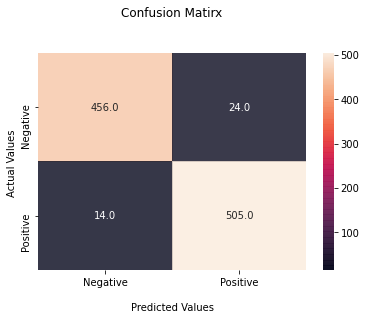

In [80]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true,y_pred)
ax = sns.heatmap(conf_matrix, annot=True, 
            fmt='.1f',alpha = 0.8)
ax.set_title('Confusion Matirx\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# Other Metrics

In [89]:
TP = 505
TN = 456
FP = 24
FN =14
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy: ",accuracy)
precision = TP / (TP + FP)
print("\nPrecision : ",precision)
recall = TP / (TP + FN) 
print("\nRecall : ", recall)
sensitivity= TP/(TP+FN)
print("\nSensitivity : ",sensitivity)
specificity = TN /(FP+TN)
print("\nSpecificity: ", specificity)

f1_score = (2*precision * recall) / (precision + recall)


Accuracy:  0.9619619619619619

Precision :  0.9546313799621928

Recall :  0.9730250481695568

Sensitivity :  0.9730250481695568

Specificity:  0.95
